# Congress Words

In [1]:
import pandas as pd
import numpy as np

In [2]:
congress_words = pd.read_csv("../data/legislators.csv")
congress_words = pd.DataFrame(congress_words)
congress_words.head()

,title,firstname,middlename,lastname,name_suffix,nickname,party,state,district,in_office,...,govtrack_id,crp_id,twitter_id,congresspedia_url,youtube_url,facebook_id,official_rss,senate_class,birthdate,oc_email
0,Rep,Neil,NaN,Abercrombie,NaN,NaN,D,HI,1,0,...,400001,N00007665,neilabercrombie,http://www.opencongress.org/wiki/Neil_Abercrombie,http://youtube.com/hawaiirep1,NaN,NaN,NaN,1938-06-26,NaN
1,Rep,Gary,L.,Ackerman,NaN,NaN,D,NY,5,0,...,400003,N00001143,repgaryackerman,http://www.opencongress.org/wiki/Gary_Ackerman,http://youtube.com/RepAckerman,RepAcherman,NaN,NaN,1942-11-19,NaN
2,Rep,Robert,B.,Aderholt,NaN,NaN,R,AL,4,1,...,400004,N00003028,Robert_Aderholt,http://www.opencongress.org/wiki/Robert_Aderholt,http://youtube.com/RobertAderholt,19787529402,NaN,NaN,1965-07-22,Rep.Aderholt@opencongress.org
3,Sen,Daniel,Kahikina,Akaka,NaN,NaN,D,HI,Junior Seat,0,...,300001,N00007653,NaN,http://www.opencongress.org/wiki/Daniel_Akaka,http://youtube.com/senatorakaka,danielakaka,NaN,I,1924-09-11,NaN
4,Sen,Wayne,A.,Allard,NaN,NaN,R,CO,Senior Seat,0,...,300003,N00009082,NaN,http://www.opencongress.org/wiki/Wayne_Allard,NaN,NaN,NaN,II,1943-12-02,NaN


In [3]:
congress_words.columns.tolist()

['title',
 'firstname',
 'middlename',
 'lastname',
 'name_suffix',
 'nickname',
 'party',
 'state',
 'district',
 'in_office',
 'gender',
 'phone',
 'fax',
 'website',
 'webform',
 'congress_office',
 'bioguide_id',
 'votesmart_id',
 'fec_id',
 'govtrack_id',
 'crp_id',
 'twitter_id',
 'congresspedia_url',
 'youtube_url',
 'facebook_id',
 'official_rss',
 'senate_class',
 'birthdate',
 'oc_email']

## API call
I used the bioGuide id to retrive the words

In [4]:
l_bioGuides = congress_words.bioguide_id.tolist()
print l_bioGuides[:10]

['A000014', 'A000022', 'A000055', 'A000069', 'A000109', 'A000210', 'A000357', 'A000358', 'A000360', 'A000361']


### API call method it can be tweeked to scrape other data:

In [5]:
from urllib2 import Request, urlopen
import json
from pandas.io.json import json_normalize
def requestWords( id ):

    id = str(id)
    url = "http://capitolwords.org/api/1/phrases.json?entity_type=legislator&entity_value="+id+"&apikey=0bf8e7eb6ce146f48217bfee767c998d"
    request=Request(url)
    response = urlopen(request)
    contents = response.read()
    len(contents)
    if len(contents) > 2:
        data = json.loads(contents)
        words = json_normalize(data)
        list_of_words = words.ngram.tolist()
        string_of_words ="|".join(list_of_words)
        return string_of_words
    else:
        return np.nan

In [6]:
congress_words['favorite_words'] = congress_words.apply(lambda row: requestWords(row['bioguide_id']),axis=1)

In [7]:
congress_words.favorite_words.head(20)

0     hawaiian|hawaii|hawaiians|hawaii's|kalaupapa|e...
1     queens|rabbi|jewish|bayside|flushing|nassau|br...
2     aderholt|requesting|irons|huntsville|alabama|r...
3     hawaii's|hawaii|hawaiians|hawaiian|dsh|va|fas|...
4     colorado|flats|missile|rocky|colorado's|denver...
5     camden|gloucester|cyprus|rutgers|opic|jersey|p...
6     mercury|maine|prescription|pharmaceutical|drug...
7     freddie|morgenthau|fannie|you've|pilgrims|mayf...
8     tennesseans|carbon-free|tennessee|electricity|...
9     rodney|baton|rouge|lsu|louisiana|la|ruston|req...
10    murphy|drill|pittsburgh|altmire|sbir|oil|anwr|...
11    upstate|herkimer|utica|tay-sachs|suny|cybersec...
12    nj|2009|objection|army|minutes|recognized|6|se...
13    fairborn|ohio's|xenia|gire|wright-patterson|wa...
14    endeavour|skyler|meanings|shuttle|eagle|scout|...
15    foia|8015|aumf|government-set|davis-bacon|1034...
16    hampshire|guantanamo|timberland|gitmo|detainin...
17                                              

## Clean responses that where null

In [8]:
congress_words = congress_words[congress_words.favorite_words.notnull()]

In [9]:
print "Number of legislators with word record:", len(congress_words.favorite_words)

Number of legislators with word record: 763


# Build words matrix

In [10]:
favorite_words = congress_words.favorite_words.str.get_dummies(sep = "|")
print favorite_words.head(3)
favorite_words.columns[:100]

   $0  $1  $1.50  $10  $100  $1000  $100000  $1000000  $10638425746293  $107  \
0   0   0      0    0     0      0        0         0                0     0   
1   0   0      0    0     0      0        0         0                0     0   
2   0   0      0    0     0      0        0         0                0     0   

   ...   ziegler  zimbabwe  zimmer  zinc  zion  zoberman  zone  zones  zoo  \
0  ...         0         0       0     0     0         0     0      0    0   
1  ...         0         0       0     0     0         0     0      0    0   
2  ...         0         0       0     0     0         0     0      0    0   

   zuni  
0     0  
1     0  
2     0  

[3 rows x 14420 columns]


Index([u'$0', u'$1', u'$1.50', u'$10', u'$100', u'$1000', u'$100000',
       u'$1000000', u'$10638425746293', u'$107', u'$12', u'$120', u'$12000',
       u'$13', u'$1300', u'$139', u'$14', u'$1400', u'$15', u'$1500',
       u'$150000', u'$1500000', u'$159', u'$1600', u'$17', u'$170', u'$18',
       u'$186', u'$19', u'$191', u'$2', u'$2.33', u'$200', u'$2000',
       u'$200000', u'$2000000', u'$21', u'$23', u'$23000', u'$236', u'$240',
       u'$25', u'$250', u'$250000', u'$2500000', u'$270', u'$27000', u'$290',
       u'$29000', u'$3', u'$300', u'$3000', u'$30000', u'$300000', u'$30500',
       u'$310', u'$319', u'$3300', u'$35', u'$350', u'$35000', u'$350000',
       u'$38', u'$4', u'$4.50', u'$400', u'$400000', u'$45', u'$46', u'$464',
       u'$5', u'$50', u'$500', u'$5000', u'$50000', u'$500000', u'$5100000',
       u'$58', u'$58000', u'$6', u'$60', u'$600', u'$600000', u'$6000000',
       u'$61', u'$683', u'$700', u'$713', u'$730', u'$750', u'$750000',
       u'$760', u'$787', u'$

In [11]:
favorite_words.shape

(763, 14420)

## Problem: a lot of numbers!!!!
Live API so I can't hard code where the word columns start

In [12]:
favorite_words.columns[760:800]

Index([u'944', u'95', u'952', u'953', u'96', u'964', u'97', u'98', u'9800',
       u'9896', u'990', u'991', u'9946', u'999', u'9:30', u'?', u'a', u'a&m',
       u'a-plus', u'a.', u'a.d.', u'a.m.', u'a.m.e.', u'aaa', u'aacute',
       u'aahsa', u'aamodt', u'aana', u'aapg', u'aapi', u'aapis', u'aaron',
       u'aarp', u'abandon', u'abandoned', u'abaya', u'abbas', u'abbas's',
       u'abbeville', u'abby'],
      dtype='object')

In [13]:
word_list = favorite_words.columns.tolist()
print "Some of the words in it", word_list[800:900]

Some of the words in it [u'abducted', u'abduction', u'abductions', u'abdullah', u'abel', u'abercrombie', u'aberdeen', u'abernathy', u'abilene', u'abilities', u'ability', u'abilityone', u'abington', u'able', u'able-bodied', u'abm', u'aboard', u'abolitionist', u'abortion', u'abortionist', u'abortions', u'about', u'abraham', u'abscissa', u'absence', u'absent', u'absentee', u'absolutely', u'abstinence', u'absurd', u'abu', u'abu-jamal', u'abundance', u'abundant', u'abuse', u'abused', u'abuses', u'abusive', u'aca', u'acacia', u'academic', u'academics', u'academies', u'academy', u'acadiana', u'accept', u'acceptable', u'acceptance', u'access', u'accessibility', u'accessible', u'accessing', u'accidental', u'accidents', u'accolades', u'accommodate', u'accompanying', u'accomplishments', u'accordance', u'accordingly', u'accords', u'account', u'accountability', u'accountable', u'accounting', u'accounts', u'accreditation', u'accreditors', u'accrual', u'accrued', u'accumulate', u'accumulated', u'accu

In [46]:
def word_finder(list,start):
    for index, element in enumerate(list, start):
        if element[0]!="a":
            pass
        else:
            first = index
            break
    return first
x = word_list
print word_finder(x,0)

def wordlist(dataFrame):
    list = dataFrame.columns.tolist()
    for index, element in enumerate(list):
        if element[0]!="a":
            pass
        else:
            first = index
            break
    return list[first:]

776


In [336]:
print word_list[776]
#del favorite_words['a']
word_list = favorite_words.columns.tolist()

a&m


# Give words a count that is relevant

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=1)
vectorizer

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

#### Corpus
I used the whole must repited words to have more of a global tf-idf

In [338]:
corpus = favorite_words.columns.tolist()
X = vectorizer.fit_transform(corpus)
len(corpus)

14419

In [322]:
analyze = vectorizer.build_analyzer()
print analyze("economy a this")
vectorizer.get_feature_names()[910:920]

[u'economy', u'this']


[u'africans',
 u'after',
 u'aftermath',
 u'afternoon',
 u'afterschool',
 u'afterward',
 u'ag',
 u'again',
 u'against',
 u'agana']

In [323]:
vectorizer.vocabulary_.get('document') #not seen in the training corpus will be completely ignored in future calls to the transform method

4357

In [328]:
unrelated = vectorizer.transform(['Something completely unrelated']).toarray()
len(unrelated[0])


13670

# Method for later analysis


In [313]:
def new_text_vector(string):
    array = analyze(string)
    #array = vectorizer.transform([string]).toarray()
    return array
new_text_vector("lalalalalalalala Some piece of text I want to classify for being as rejecting discrimination")

[u'lalalalalalalala',
 u'some',
 u'piece',
 u'of',
 u'text',
 u'want',
 u'to',
 u'classify',
 u'for',
 u'being',
 u'as',
 u'rejecting',
 u'discrimination']

# Transformer

In [22]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformer

TfidfTransformer(norm=u'l2', smooth_idf=True, sublinear_tf=False,
         use_idf=True)

In [23]:
tfidf = transformer.fit_transform(favorite_words)
tfidf_array = tfidf.toarray()
tfidf_array.shape
tfidf_array[20].max()
transformer.idf_

array([ 6.25227343,  4.93051759,  6.94542061, ...,  6.94542061,
        6.5399555 ,  6.94542061])

In [464]:
analyze = vectorizer.build_analyzer()
analyze("iraq this a unanana")
v = CountVectorizer().fit("iraq this a unanana").vocabulary_

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1)
vectorizer.fit_transform(corpus)
vec_idf = vectorizer.idf_
print len(vec_idf)

13670


In [25]:
words_weight = pd.DataFrame(tfidf_array, index=congress_words.index , columns=corpus)
print congress_words.index
print words_weight.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            886, 887, 888, 889, 890, 891, 892, 893, 894, 896],
           dtype='int64', length=763)
Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            886, 887, 888, 889, 890, 891, 892, 893, 894, 896],
           dtype='int64', length=763)


In [26]:
capitol_words = congress_words.merge(words_weight, right_index=True, left_index=True)
capitol_words.head()

,title_x,firstname,middlename,lastname,name_suffix,nickname,party_x,state_x,district_x,in_office,...,ziegler,zimbabwe,zimmer,zinc,zion,zoberman,zone,zones,zoo,zuni
0,Rep,Neil,NaN,Abercrombie,NaN,NaN,D,HI,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Rep,Gary,L.,Ackerman,NaN,NaN,D,NY,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Rep,Robert,B.,Aderholt,NaN,NaN,R,AL,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Sen,Daniel,Kahikina,Akaka,NaN,NaN,D,HI,Junior Seat,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Sen,Wayne,A.,Allard,NaN,NaN,R,CO,Senior Seat,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
word_column_names_capitol = capitol_words.columns.tolist()[word_finder(capitol_words,0):]
capitol_words[word_column_names_capitol].head()

,a&m,a-plus,a.,a.d.,a.m.,a.m.e.,aaa,aacute,aahsa,aamodt,...,ziegler,zimbabwe,zimmer,zinc,zion,zoberman,zone,zones,zoo,zuni
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.096384,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
capitol_words[word_column_names_capitol].sum().max()

12.815679735406123

## Getting rid of the words that 95% of the people said
Because they don't add much in to analyzing what makes legislators different from one another.

In [29]:
word_frequencies = (capitol_words[word_column_names_capitol]>0).astype(int).sum(axis=0).astype(float)/capitol_words.shape[0]
most_frequent_words = word_frequencies[word_frequencies>.95].index
most_frequent_words

Index([], dtype='object')

In [30]:
word_frequencies = (capitol_words[word_column_names_capitol]>0).astype(int).sum(axis=0)
word_frequencies.max()

323

In [31]:
capitol_words.party_x.unique()
party_mask = capitol_words.party_x!="I"
two_party_words = capitol_words[party_mask]
print "Entries before getting rid of independents:", capitol_words.shape[0]
print "Entries after getting rid of independents:", two_party_words.shape[0]
print "Number of independents:", (capitol_words.shape[0])-(two_party_words.shape[0])

Entries before getting rid of independents: 763
Entries after getting rid of independents: 760
Number of independents: 3


# Party Dummies assigning 1 to Republicans


In [32]:
party_dummies = pd.get_dummies(capitol_words.party_x).astype(int)
party_dummies = party_dummies[["R"]]
party_dummies.head()
capitol_words = party_dummies.merge(capitol_words, right_index=True, left_index=True)

capitol_words.head()

,R,title_x,firstname,middlename,lastname,name_suffix,nickname,party_x,state_x,district_x,...,ziegler,zimbabwe,zimmer,zinc,zion,zoberman,zone,zones,zoo,zuni
0,0,Rep,Neil,NaN,Abercrombie,NaN,NaN,D,HI,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,Rep,Gary,L.,Ackerman,NaN,NaN,D,NY,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,Rep,Robert,B.,Aderholt,NaN,NaN,R,AL,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Sen,Daniel,Kahikina,Akaka,NaN,NaN,D,HI,Junior Seat,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,Sen,Wayne,A.,Allard,NaN,NaN,R,CO,Senior Seat,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# First Decision Tree

In [33]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy import stats

In [34]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
X_words = capitol_words[word_column_names_capitol]
y_words = capitol_words["R"]
X_train,X_test,y_train,y_test = train_test_split(X_words,y_words,test_size=0.4)

from sklearn.tree import DecisionTreeClassifier
words_tree = DecisionTreeClassifier(max_depth=3, random_state=1)
words_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [36]:
words_tree.feature_importances_
features = pd.DataFrame({'feature':word_column_names_capitol, 'importance':words_tree.feature_importances_}).sort_values(by='importance',ascending=False)

In [37]:
features.head()

,feature,importance
10505,requesting,0.504671
11635,spending,0.307311
10499,republican,0.142692
3865,dog,0.045326
9098,overpayment,0.000000


## Helpful methods
a mask and groupby for dataframe access, something to delete sum 0 columns

In [38]:
def my_mask(df,column,condition,value):
    new_data = []
    if condition == "==":
        new_data = df[df[column] == value]
    elif condition == "<=":
        new_data = df[df[column] <= value]
    elif condition == "!=":
        new_data = df[df[column] != value]
    elif condition == ">=":
        new_data = df[df[column] >= value]
    elif condition == ">":
        new_data = df[df[column] > value]
    elif condition == "<":
        new_data = df[df[column] < value]
    else:
        print "arguments needed-column,condition,value-:"
    return new_data 
def subset(df,column):
    dict = {}
    subs = df[column].unique()  
    for element in subs:
         dict[element] = my_mask(df,column,"==",element)
    print "New available dictionary of dataframes is:\n subsets_of ",subs 
    return dict  
def clean_sparse_irrelevant(pd):
    cols = pd.columns
    deleted=0
    for c in cols:
        x=pd[c]
        if x.dtype=="float64":
            if x.sum()==0:
                del pd[c]
                deleted += 1
    print "DELETED:",deleted
    return pd

In [39]:
states = subset(capitol_words,"state_x")
states['AK'].head()
parties = subset(capitol_words, "party_x")
parties['D'].head()

New available dictionary of dataframes is:
 subsets_of  ['HI' 'NY' 'AL' 'CO' 'NJ' 'ME' 'MO' 'TN' 'LA' 'PA' 'OH' 'FL' 'MI' 'NH' 'NC'
 'MD' 'TX' 'MT' 'CA' 'UT' 'AR' 'DE' 'NM' 'GA' 'OR' 'IA' 'VA' 'KS' 'KY' 'IN'
 'WV' 'WA' 'WI' 'NV' 'IL' 'SC' 'GU' 'OK' 'MN' 'WY' 'AK' 'MA' 'ND' 'CT' 'VI'
 'MS' 'ID' 'RI' 'AS' 'AZ' 'NE' 'PR' 'SD' 'VT' 'DC' 'MP']
New available dictionary of dataframes is:
 subsets_of  ['D' 'R' 'I']


,R,title_x,firstname,middlename,lastname,name_suffix,nickname,party_x,state_x,district_x,...,ziegler,zimbabwe,zimmer,zinc,zion,zoberman,zone,zones,zoo,zuni
0,0,Rep,Neil,NaN,Abercrombie,NaN,NaN,D,HI,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,Rep,Gary,L.,Ackerman,NaN,NaN,D,NY,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Sen,Daniel,Kahikina,Akaka,NaN,NaN,D,HI,Junior Seat,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,Rep,Robert,E.,Andrews,NaN,Rob,D,NJ,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,Rep,Thomas,H.,Allen,NaN,Tom,D,ME,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
clean_sparse_irrelevant(states['AK'])
AK = states["AK"]
AK_words = wordlist(states['AK'])
AK[AK_words].sum()
AK_word_count = pd.DataFrame({'feature':AK_words, 'words':AK[AK_words].sum()}).sort_values(by='words',ascending=False)
AK_word_count.head(20)

DELETED: 0


,feature,words
alaskans,alaskans,0.496549
anchorage,anchorage,0.496549
alaska's,alaska's,0.481533
alaskan,alaskan,0.481533
arctic,arctic,0.431613
fishing,fishing,0.382376
fairbanks,fairbanks,0.379415
ak,ak,0.379415
alaska,alaska,0.378358
tongass,tongass,0.376191


# Standarization
with sklearn.preprocessing package
## CENTERING SPARSE DATA... not!
centering sparse data would destroy the sparseness structure in the data, but MaxAbsScaler and maxabs_scale were specifically designed for scaling sparse data, specially if the features are in different scales.
scale and StandardScaler can accept scipy.sparse matrices as input, as long as with_centering=False
[More about this](http://scikit-learn.org/stable/modules/preprocessing.html#scaling-sparse-data)
#### Small example on Alaska:
I will normalize on one small subset of my data just to see what the results would be, how the values would change.

In [70]:
AK

,R,title_x,firstname,middlename,lastname,name_suffix,nickname,party_x,state_x,district_x,...,veterans,village,villages,water,whaling,wilderness,wildlife,wind,yeas,youth
86,0,Sen,Mark,NaN,Begich,NaN,NaN,D,AK,Junior Seat,...,0.051424,0.091710,0.124813,0.000000,0.000000,0.000000,0.074392,0.000000,0.000000,0.000000
559,1,Sen,Lisa,A.,Murkowski,NaN,NaN,R,AK,Senior Seat,...,0.000000,0.095305,0.129706,0.068622,0.000000,0.085929,0.077309,0.085929,0.000000,0.090092
750,1,Sen,Ted,F.,Stevens,NaN,NaN,R,AK,Senior Seat,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.089775,0.080769,0.000000,0.106864,0.000000
889,1,Rep,Don,E.,Young,NaN,NaN,R,AK,0,...,0.000000,0.000000,0.000000,0.000000,0.124897,0.082743,0.074442,0.000000,0.000000,0.000000


In [75]:
from sklearn.preprocessing import maxabs_scale
print maxabs_scale(AK.ix[:,43:], axis=0, copy=False)
AK.ix[:,43:] = maxabs_scale(AK.ix[:,43:], axis=0, copy=False)
print AK.ix[:,43:].head()

[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.95716082  0.         ...,  1.          0.          1.        ]
 [ 1.          1.          1.         ...,  0.          1.          0.        ]
 [ 0.          0.92166899  0.         ...,  0.          0.          0.        ]]
     absence     acres  agreed        ak    alaska  alaska's   alaskan  \
86       0.0  0.000000     0.0  0.962272  0.921049  0.921049  0.921049   
559      0.0  0.957161     0.0  1.000000  0.957161  0.957161  0.957161   
750      1.0  1.000000     1.0  0.000000  1.000000  1.000000  1.000000   
889      0.0  0.921669     0.0  0.962920  0.921669  0.921669  0.921669   

     alaskans  alcohol  allan  ...    veterans   village  villages  water  \
86   0.921049      0.0    1.0  ...         1.0  0.962272  0.962272    0.0   
559  0.957161      1.0    0.0  ...         0.0  1.000000  1.000000    1.0   
750  1.000000      0.0    0.0  ...         0.0  0.000000  0.000000    0.0   


## Now the data is sacled without loosing it's sparese structure

In [76]:
AK

,R,title_x,firstname,middlename,lastname,name_suffix,nickname,party_x,state_x,district_x,...,veterans,village,villages,water,whaling,wilderness,wildlife,wind,yeas,youth
86,0,Sen,Mark,NaN,Begich,NaN,NaN,D,AK,Junior Seat,...,1.0,0.962272,0.962272,0.0,0.0,0.000000,0.921049,0.0,0.0,0.0
559,1,Sen,Lisa,A.,Murkowski,NaN,NaN,R,AK,Senior Seat,...,0.0,1.000000,1.000000,1.0,0.0,0.957161,0.957161,1.0,0.0,1.0
750,1,Sen,Ted,F.,Stevens,NaN,NaN,R,AK,Senior Seat,...,0.0,0.000000,0.000000,0.0,0.0,1.000000,1.000000,0.0,1.0,0.0
889,1,Rep,Don,E.,Young,NaN,NaN,R,AK,0,...,0.0,0.000000,0.000000,0.0,1.0,0.921669,0.921669,0.0,0.0,0.0


# GLOBAL data scale
### Method to make things easier not that I saw it working

In [77]:
def word_maxabsscaler(dataFrame,index):
    dataFrame.ix[:,word_finder(dataFrame,index):] = maxabs_scale(dataFrame.ix[:,word_finder(dataFrame,index):], axis=0, copy=False)

In [78]:
word_maxabsscaler(capitol_words,30)
clean_sparse_irrelevant(capitol_words)
capitol_words.head()

DELETED: 0


,R,title_x,firstname,middlename,lastname,name_suffix,nickname,party_x,state_x,district_x,...,ziegler,zimbabwe,zimmer,zinc,zion,zoberman,zone,zones,zoo,zuni
0,0,Rep,Neil,NaN,Abercrombie,NaN,NaN,D,HI,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,Rep,Gary,L.,Ackerman,NaN,NaN,D,NY,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,Rep,Robert,B.,Aderholt,NaN,NaN,R,AL,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Sen,Daniel,Kahikina,Akaka,NaN,NaN,D,HI,Junior Seat,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,Sen,Wayne,A.,Allard,NaN,NaN,R,CO,Senior Seat,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature Decomposition and Dimensionality Reduction
Just to compare result between these models in this particular data set.
This is an example of when it's a good idea to reduce the number of columns in the data set. There are more than 14 000 columns (it was the resut of getting the words that were said the must as dummies and then getting the td-idf count of them)
So too many columns are being used to predict the target variable, that is Republican or Democrat.
One of the risks of these techniques is overfitting the model

In [80]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression, LogisticRegression, ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.cross_validation import cross_val_score, train_test_split
import scipy.stats as stats
%matplotlib inline
import seaborn as sns

In [81]:
capitol_words.head()

,R,title_x,firstname,middlename,lastname,name_suffix,nickname,party_x,state_x,district_x,...,ziegler,zimbabwe,zimmer,zinc,zion,zoberman,zone,zones,zoo,zuni
0,0,Rep,Neil,NaN,Abercrombie,NaN,NaN,D,HI,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,Rep,Gary,L.,Ackerman,NaN,NaN,D,NY,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,Rep,Robert,B.,Aderholt,NaN,NaN,R,AL,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Sen,Daniel,Kahikina,Akaka,NaN,NaN,D,HI,Junior Seat,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,Sen,Wayne,A.,Allard,NaN,NaN,R,CO,Senior Seat,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##  where words start being useful
After normalization, some words had a global weight that was very small in a td-idf matrix count, so their column.sum() was cero, I will not feed that to my model because a colum n filled with 0 will not add much variance in a spacer matrix. Also at index 30 is where I the sparse matrix got attached to the original data set.

In [83]:
capitol_words[word_column_names_capitol].head()

,a&m,a-plus,a.,a.d.,a.m.,a.m.e.,aaa,aacute,aahsa,aamodt,...,ziegler,zimbabwe,zimmer,zinc,zion,zoberman,zone,zones,zoo,zuni
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.096384,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
global_correlations = capitol_words.ix[:,836:].corr()
global_correlations.head()

,aberdeen,abernathy,abilene,abilities,ability,abilityone,abington,able,able-bodied,abm,...,ziegler,zimbabwe,zimmer,zinc,zion,zoberman,zone,zones,zoo,zuni
aberdeen,1.000000,-0.002268,-0.002268,-0.002268,-0.002268,-0.003932,-0.002268,-0.005992,-0.002268,-0.002268,...,-0.002268,-0.003210,-0.002268,-0.002268,-0.002268,-0.003209,-0.003198,-0.002268,-0.003208,-0.002268
abernathy,-0.002268,1.000000,-0.001312,-0.001312,-0.001312,-0.002275,-0.001312,-0.003467,-0.001312,-0.001312,...,-0.001312,-0.001857,-0.001312,-0.001312,-0.001312,-0.001856,-0.001850,-0.001312,-0.001856,-0.001312
abilene,-0.002268,-0.001312,1.000000,-0.001312,-0.001312,-0.002275,-0.001312,-0.003467,-0.001312,-0.001312,...,-0.001312,-0.001857,-0.001312,-0.001312,-0.001312,-0.001856,-0.001850,-0.001312,-0.001856,-0.001312
abilities,-0.002268,-0.001312,-0.001312,1.000000,-0.001312,-0.002275,-0.001312,-0.003467,-0.001312,-0.001312,...,-0.001312,-0.001857,-0.001312,-0.001312,-0.001312,-0.001856,-0.001850,-0.001312,-0.001856,-0.001312
ability,-0.002268,-0.001312,-0.001312,-0.001312,1.000000,-0.002275,-0.001312,0.447163,-0.001312,-0.001312,...,-0.001312,-0.001857,-0.001312,-0.001312,-0.001312,-0.001856,-0.001850,-0.001312,-0.001856,-0.001312


In [ ]:
sns.plt.figure(figsize=(24,20))
sns.heatmap(capitol_words.ix[:,836:].transpose().corr().values)

In [87]:
pca = PCA()
transformed_pca_x = pca.fit_transform(capitol_words[word_column_names_capitol])
component_names = ["component_"+str(comp) for comp in range(1, len(pca.explained_variance_)+1)]
transformed_pca_x = pd.DataFrame(transformed_pca_x,columns=component_names)
print "CCOMPONENT MATRIX:"
transformed_pca_x.head()

CCOMPONENT MATRIX:


,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_754,component_755,component_756,component_757,component_758,component_759,component_760,component_761,component_762,component_763
0,-0.224480,-0.452334,0.113147,-0.837146,0.221519,-0.449614,0.953103,0.527301,-0.294541,0.106687,...,0.031183,-0.007764,0.009641,-0.131950,0.092108,-0.054300,0.046542,0.046614,0.015238,-1.491324e-14
1,0.122874,-1.617364,1.173446,-1.117909,-2.904385,0.645005,1.099246,-0.098900,2.621183,-0.296297,...,-0.232765,-0.124079,-0.034230,0.058049,0.071679,-0.168641,-0.036262,0.093936,0.011447,-1.491324e-14
2,-0.881820,-0.661854,-0.793238,-0.685070,0.039017,-0.544605,-0.204850,0.636111,-0.647944,-0.950342,...,0.076137,-0.061312,0.070325,-0.050951,0.062893,-0.000775,0.005773,0.035851,-0.012703,-1.491324e-14
3,1.326928,0.179372,0.537611,-1.262296,1.292680,0.818766,0.232159,0.280342,-0.265586,0.209218,...,0.047391,0.086163,-0.022755,-0.275561,0.241222,0.044327,-0.086261,0.037930,0.002989,-1.491324e-14
4,2.580614,1.916924,-0.533527,-2.672486,-0.042675,-0.268796,0.374946,0.538247,0.395623,0.483640,...,0.018014,-0.170579,-0.140365,-0.334942,-0.070205,0.228099,0.104589,-0.003303,0.016562,-1.491324e-14


In [91]:
component_matrix = pd.DataFrame(pca.components_,index=component_names, columns=word_column_names_capitol)
component_matrix["explained_variance_ratio"] = pca.explained_variance_ratio_
component_matrix["eigenvalue"] = pca.explained_variance_

# Component Matrix:
#### The reslt is not the easiest for intepretation
The problem with this is that PCA expects features with little to no correlation, and in this case, with words if I were to build a model that was based on eliminating similar words or correlated words, this would only acomplish the task of being overfitted and it would not do well at all for predicting a real example.
Let's say one of the components was based on the word "small" and "small" is correlated with "little" but I just deleted little. Unless I have another way to capture semantic similarity I can't get rid of those words just yet.

In [92]:
component_matrix.head()

,a&m,a-plus,a.,a.d.,a.m.,a.m.e.,aaa,aacute,aahsa,aamodt,...,zimmer,zinc,zion,zoberman,zone,zones,zoo,zuni,explained_variance_ratio,eigenvalue
component_1,-0.000263,-0.000040,0.000200,-8.481141e-05,0.005106,-0.000146,0.000068,0.000121,-0.000081,-0.000125,...,-0.000983,-0.000561,-0.000547,-0.000827,0.000844,0.000715,-0.001128,-0.000571,0.018433,1.286851
component_2,-0.000144,0.000042,-0.000273,-1.188319e-04,0.004800,-0.000162,0.000053,-0.000150,-0.000072,-0.000062,...,-0.000548,-0.000281,-0.000921,-0.002143,-0.000024,0.000873,-0.002575,-0.000506,0.014102,0.984469
component_3,-0.000323,-0.000190,-0.000317,-3.389893e-05,-0.001907,-0.000012,-0.000150,0.000133,-0.000070,-0.000274,...,-0.001036,-0.000881,-0.000120,-0.000150,-0.001189,-0.000788,0.000744,-0.000840,0.012565,0.877171
component_4,-0.000046,-0.000130,0.000461,9.861516e-07,-0.006105,-0.000030,0.000146,-0.000312,0.000037,0.000049,...,-0.000098,0.000483,-0.001064,-0.000860,-0.001667,0.001344,0.000019,-0.001854,0.010884,0.759831
component_5,0.000008,0.000182,-0.000646,-7.284733e-06,0.002609,0.000077,0.000024,-0.000637,0.000047,0.000305,...,0.000136,-0.001080,-0.000989,-0.001720,-0.001229,0.000469,0.001366,0.002696,0.008742,0.610327


# Logistic Regression

In [90]:
X = transformed_pca_x.ix[:,:500]
y = capitol_words["R"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

lr = LogisticRegression(C=1e9, penalty='l1')
lr.fit(X_train,y_train)
y_test_pred = lr.predict(X_test)

print "Test set accuracy of LR model: ",metrics.accuracy_score(y_test, y_test_pred)

Test set accuracy of LR model:  0.655021834061


#### Conclusion: Low benefit
Now with all of the features.

In [93]:
from sklearn.cross_validation import KFold, train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn import metrics
import scipy.stats as stats

In [96]:
X = capitol_words[word_column_names_capitol]
y = capitol_words["R"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

lr = LogisticRegression(C=1e9, penalty='l2')
lr.fit(X_train,y_train)
y_test_pred = lr.predict(X_test)

print "Test set accuracy of LR model: ",metrics.accuracy_score(y_test, y_test_pred)

Test set accuracy of LR model:  0.908296943231


## Null accuracy

In [98]:
print "Null accuracy on the test set: ",y_test.mean()

Null accuracy on the test set:  0.524017467249


## Dumb Model

In [99]:
from sklearn.dummy import DummyClassifier
dumb_model = DummyClassifier(strategy='most_frequent')
dumb_model.fit(X_train, y_train)
y_dumb_class = dumb_model.predict(X_test)
print "Most frequent class dummy classifier test accuracy: ",metrics.accuracy_score(y_test, y_dumb_class)

Most frequent class dummy classifier test accuracy:  0.524017467249


## Cross val scores

0.515185185185
0.907283950617
0.0573276823972


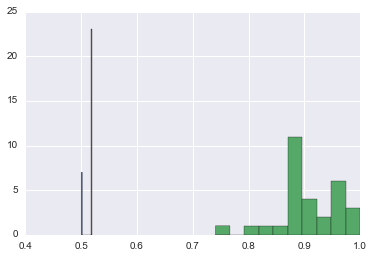

In [100]:
dumb_model = DummyClassifier(strategy='most_frequent')
dummy_scores = cross_val_score(dumb_model, X, y, cv=30)
real_scores = cross_val_score(LogisticRegression(),X , y,cv=30)
sns.plt.hist(dummy_scores)
sns.plt.hist(real_scores)
#we could use a cv=Startifield Kfold for when you have really unbalanced
#real_scores = cross_val_score(LogisticRegression(),X , y,cv=30)
print np.mean(dummy_scores)
print np.mean(real_scores)
print np.std(real_scores)

[[ 99  10]
 [ 11 109]]


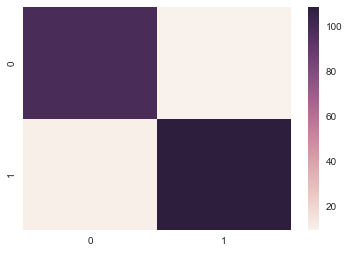

In [101]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
print cm
sns.heatmap(cm)

In [102]:
print "Sensitivity/Recall (TPR): ",metrics.recall_score(y_test,y_test_pred)
print "Precision (PPV): ", metrics.precision_score(y_test,y_test_pred)
print "NPV: ", cm[0,0] / float(cm[0,0]+cm[1,0])
print "Accuracy: ", metrics.accuracy_score(y_test,y_test_pred)
print "F1:", metrics.f1_score(y_test,y_test_pred)

Sensitivity/Recall (TPR):  0.908333333333
Precision (PPV):  0.915966386555
NPV:  0.9
Accuracy:  0.908296943231
F1: 0.912133891213


In [103]:
print "Classification Report:\n", metrics.classification_report(y_test,y_test_pred)

Classification Report:
             precision    recall  f1-score   support

          0       0.90      0.91      0.90       109
          1       0.92      0.91      0.91       120

avg / total       0.91      0.91      0.91       229



In [104]:
#lr probabilities per category for first five samples
predicted_probs_lr = lr.predict_proba(X_test).round(3)
predictions_lr = lr.predict(X_test)

print "Logistic Regression predicted probabilities for first five samples in test set:\n",predicted_probs_lr[:5]
print "Logistic Regression predictions for first five samples in test set:\n",predictions_lr[:5]
y_test_lr_df = pd.DataFrame(
    np.concatenate((
        predicted_probs_lr,predictions_lr.reshape((predictions_lr.shape[0],-1)),
        y_test.reshape((y_test.shape[0],-1))),axis=1
    ),
    columns = ["class_0","class_1","predicted","actual"])

y_test_lr_df.head()

Logistic Regression predicted probabilities for first five samples in test set:
[[ 0.966  0.034]
 [ 1.     0.   ]
 [ 0.338  0.662]
 [ 0.998  0.002]
 [ 0.183  0.817]]
Logistic Regression predictions for first five samples in test set:
[0 0 1 0 1]


,class_0,class_1,predicted,actual
0,0.966,0.034,0.0,0.0
1,1.000,0.000,0.0,0.0
2,0.338,0.662,1.0,1.0
3,0.998,0.002,0.0,0.0
4,0.183,0.817,1.0,0.0


In [108]:
bad_y_class_0 = y_test_lr_df[np.logical_and(y_test_lr_df.class_0>.9, y_test_lr_df.actual==1.0)]
print bad_y_class_0
bad_y_class_1 = y_test_lr_df[np.logical_and(y_test_lr_df.class_1>.9, y_test_lr_df.actual==0.0)]
print bad_y_class_1

     class_0  class_1  predicted  actual
46     0.983    0.017        0.0     1.0
50     0.942    0.058        0.0     1.0
55     0.955    0.045        0.0     1.0
176    0.992    0.008        0.0     1.0
     class_0  class_1  predicted  actual
76     0.063    0.937        1.0     0.0
128    0.067    0.933        1.0     0.0
150    0.055    0.945        1.0     0.0
222    0.000    1.000        1.0     0.0


# Random Forest

In [109]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

predicted_probs_rf = rf.predict_proba(X_test)
predictions_rf = rf.predict(X_test)

y_test_rf_df = pd.DataFrame(
    np.concatenate((
        predicted_probs_rf,predictions_rf.reshape((predictions_rf.shape[0],-1)),
        y_test.reshape((y_test.shape[0],-1))),axis=1
    ),
    columns = ["class_0","class_1","predicted","actual"])

y_test_rf_df.head()

,class_0,class_1,predicted,actual
0,0.70,0.30,0.0,0.0
1,0.75,0.25,0.0,0.0
2,0.28,0.72,1.0,1.0
3,0.67,0.33,0.0,0.0
4,0.65,0.35,0.0,0.0


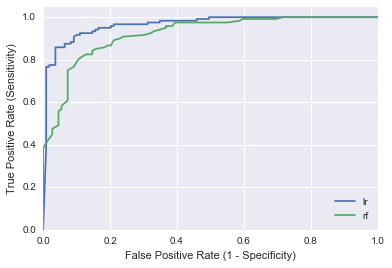

In [111]:
#generate lr model false positive and true positive rates
fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(y_test, predicted_probs_lr[:,1])

#generate same for random forest model
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_test, predicted_probs_rf[:,1])

# plot LR and RF model ROC curves
sns.plt.plot(fpr_lr, tpr_lr,label="lr")
sns.plt.plot(fpr_rf, tpr_rf,label="rf")
sns.plt.xlim([0, 1])
sns.plt.ylim([0, 1.05])
sns.plt.legend(loc="lower right")
sns.plt.xlabel('False Positive Rate (1 - Specificity)')
sns.plt.ylabel('True Positive Rate (Sensitivity)')

In [113]:
# calculate AUC for lr and rf
print "LR model AUC: ",metrics.roc_auc_score(y_test, predicted_probs_lr[:,1])
print "RF model AUC: ",metrics.roc_auc_score(y_test, predicted_probs_rf[:,1])

LR model AUC:  0.96498470948
RF model AUC:  0.919762996942


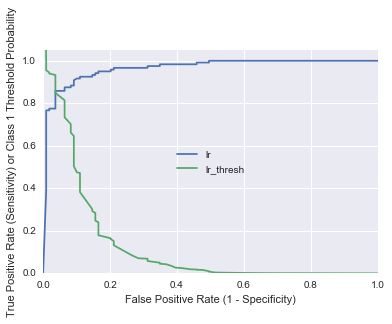

In [114]:
# plot LR and RF model ROC curves
sns.plt.plot(fpr_lr, tpr_lr,label="lr")
sns.plt.plot(fpr_lr,thresholds_lr, label="lr_thresh")
sns.plt.xlim([0, 1])
sns.plt.ylim([0, 1.05])
sns.plt.legend(loc="center")
sns.plt.xlabel('False Positive Rate (1 - Specificity)')
sns.plt.ylabel('True Positive Rate (Sensitivity) or Class 1 Threshold Probability')

In [118]:
y_test_lr_df["predicted_072"] = (y_test_lr_df.class_1 > 0.72).astype(float)
print y_test_lr_df.head()
print "Confusion matrix at original 0.5 threshold:\n",metrics.confusion_matrix(y_test_lr_df.actual,
                                                                      y_test_lr_df.predicted),"\n"
print "Classification Report at original 0.5 threshold:\n", metrics.classification_report(y_test_lr_df.actual,
                                                                                          y_test_lr_df.predicted),"\n"
print "Confusion matrix at 0.72 threshold:\n",metrics.confusion_matrix(y_test_lr_df.actual,
                                                                      y_test_lr_df.predicted_072),"\n"
print "Classification Report at 0.72 threshold:\n", metrics.classification_report(y_test_lr_df.actual,
                                                                                 y_test_lr_df.predicted_072)

   class_0  class_1  predicted  actual  predicted_075  predicted_072
0    0.966    0.034        0.0     0.0            0.0            0.0
1    1.000    0.000        0.0     0.0            0.0            0.0
2    0.338    0.662        1.0     1.0            0.0            0.0
3    0.998    0.002        0.0     0.0            0.0            0.0
4    0.183    0.817        1.0     0.0            1.0            1.0
Confusion matrix at original 0.5 threshold:
[[ 99  10]
 [ 11 109]] 

Classification Report at original 0.5 threshold:
             precision    recall  f1-score   support

        0.0       0.90      0.91      0.90       109
        1.0       0.92      0.91      0.91       120

avg / total       0.91      0.91      0.91       229


Confusion matrix at 0.72 threshold:
[[102   7]
 [ 15 105]] 

Classification Report at 0.72 threshold:
             precision    recall  f1-score   support

        0.0       0.87      0.94      0.90       109
        1.0       0.94      0.88      0.91 

In [119]:
# calculate AUC using y_pred_class (producing incorrect results)
print "Wrong way to calculate LR model AUC: ",metrics.roc_auc_score(y_test, predictions_lr)
print "Wrong way to calculate RF model AUC: ",metrics.roc_auc_score(y_test, predictions_rf)

Wrong way to calculate LR model AUC:  0.908295107034
Wrong way to calculate RF model AUC:  0.837423547401


array([<matplotlib.axes._subplots.AxesSubplot object at 0x146bd1150>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x146a37350>], dtype=object)

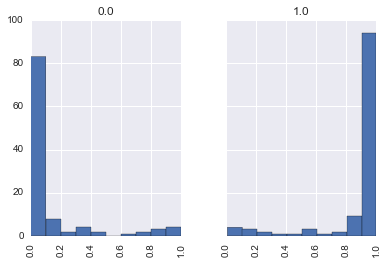

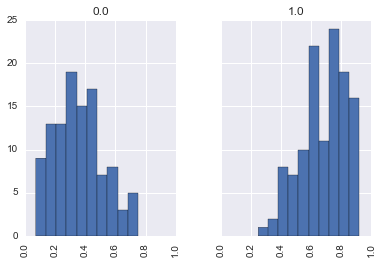

In [120]:
# histogram of predicted probabilities grouped by actual response value for LR
y_test_lr_df.class_1.hist(by= y_test_lr_df.actual, sharex=True, sharey=True)
#same for RF
y_test_rf_df.class_1.hist(by= y_test_rf_df.actual, sharex=True, sharey=True)

# Label Encoder

In [121]:
#convert outcome into binary 0/1 attribute
le = LabelEncoder()
#create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)
#create logistic regression object
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_test_pred = lr.predict(X_test)

print "Test set accuracy of default 0.5 threshold LR model: ",metrics.accuracy_score(y_test, y_test_pred)

Test set accuracy of default 0.5 threshold LR model:  0.908296943231


(array([ 46.,  19.,  21.,  12.,  14.,   8.,  13.,  12.,  22.,  62.]),
 array([  6.34175732e-04,   1.00409657e-01,   2.00185139e-01,
          2.99960621e-01,   3.99736103e-01,   4.99511584e-01,
          5.99287066e-01,   6.99062548e-01,   7.98838030e-01,
          8.98613511e-01,   9.98388993e-01]),
 <a list of 10 Patch objects>)

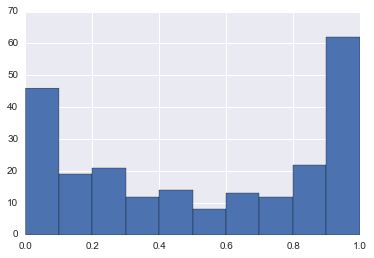

In [122]:
# calculate predicted probabilities for class 1
y_pred_prob1 = lr.predict_proba(X_test)[:, 1]
# show predicted probabilities in a histogram
sns.plt.hist(y_pred_prob1)

In [123]:
# calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob1)

0.97048929663608563

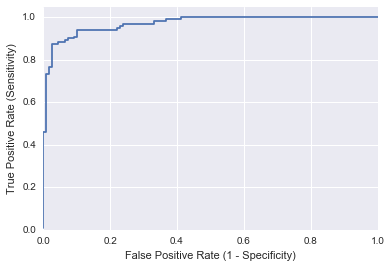

In [124]:
# plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob1)
sns.plt.plot(fpr, tpr)
sns.plt.xlim([0, 1])
sns.plt.ylim([0, 1.05])
sns.plt.xlabel('False Positive Rate (1 - Specificity)')
sns.plt.ylabel('True Positive Rate (Sensitivity)')

# Back to the Logistic Regression 

In [177]:
coef = lr.coef_
word_column_names_capitolcoeficient_weight = pd.DataFrame({'coeficient':coef[0], 'words':word_column_names_capitol}).sort_values(by='coeficient',ascending=False)


In [202]:
my_mask(coeficient_weight,"coeficient","<=",0.2).shape[0]
my_mask(coeficient_weight,"coeficient",">=",0.27)

,coeficient,words
10505,1.144067,requesting
4356,0.951347,entity
12182,0.678557,taxes
3577,0.636294,description
11635,0.598514,spending
7288,0.523187,liability
12280,0.514491,terrorists
41,0.471373,abortion
11609,0.471207,speaker
11826,0.430632,stimulus


In [151]:
#vertebral_data.outcome.value_counts
capitol_words.party_x.value_counts()`

R    393
D    367
I      3
Name: party_x, dtype: int64

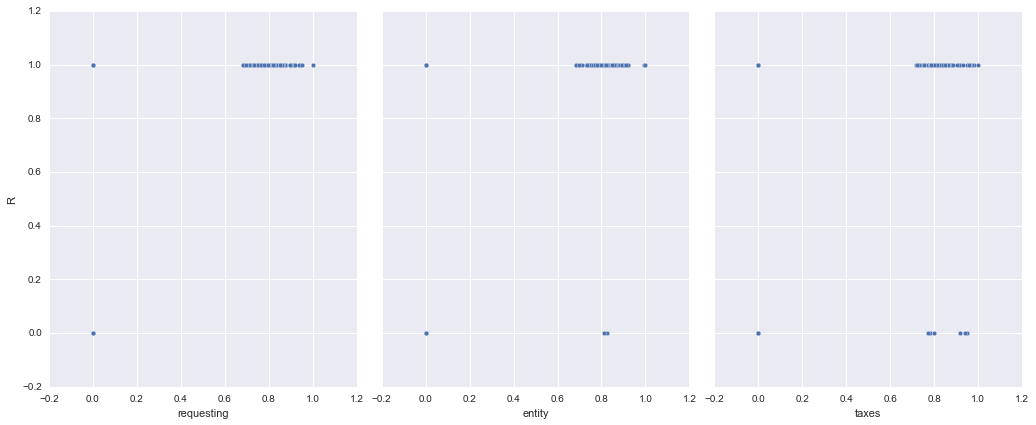

In [198]:
sns.pairplot(capitol_words,x_vars=["requesting","entity","taxes"],y_vars="R", size=6, aspect=0.8)

# Class predictions

In [210]:
outcome_pred_class_log = lr.predict(X)
outcome_pred_class_log.sort()

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


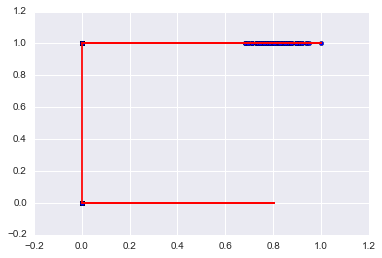

In [211]:
# plot the class predictions
capitol_words.sort('R', inplace=True)
plt.scatter(capitol_words.requesting, capitol_words.R)
plt.plot(capitol_words.requesting, outcome_pred_class_log, color='red')

In [226]:
my_mask(coeficient_weight,"coeficient","<=",-.3)

,coeficient,words
11623,-0.304852,speculation
6646,-0.306730,jack
2536,-0.307061,coast
3061,-0.307973,coverage
13498,-0.308336,would
4140,-0.319878,education
241,-0.324439,afghanistan
1390,-0.327718,black
9917,-0.330338,profits
2399,-0.333728,civil


In [445]:
from sklearn.feature_extraction.text import TfidfTransformer
lala = "It isn’t enough to merely downsize government, having a smaller version of the same failed systems. We must do things in a dramatically different way by reversing the undermining of federalism and the centralizing of power in Washington. We look to the example set by Republican Governors and legislators all across the nation. Their leadership in reforming and reengineering government closest to the people vindicates the role of the States as the laboratories of democracy.Our approach, like theirs, is two-fold. We look to government – local, State, and federal – for the things government must do, but we believe those duties can be carried out more efficiently and at less cost. For all other activities, we look to the private sector; for the American people’s resourcefulness, productivity, innovation, fiscal responsibility, and citizen-leadership have always been the true foundation of our national greatness For much of the last century, an opposing view has dominated public policy where we have witnessed the expansion, centralization, and bureaucracy in an entitlement society. Government has lumbered on, stifling innovation, with no incentive for fundamental change, through antiquated programs begun generations ago and now ill-suited to present needs and future requirements. As a result, today’s taxpayers – and future generations – face massive indebtedness, while Congressional Democrats and the current Administration block every attempt to turn things around. This man-made log-jam – the so-called stalemate in Washington – particularly affects the government’s three largest programs, which have become central to the lives of untold millions of Americans: Medicare, Medicaid, and Social Security committed to saving Medicare and Medicaid. Unless the programs’ fiscal ship is righted, the individuals hurt the first and the worst will be those who depend on them the most. We will save Medicare by modernizing it, by empowering its participants, and by putting it on a secure financial footing. This will be an enormous undertaking, and it should be a non-partisan one. We welcome to the effort all who sincerely want to ensure the future for our seniors and the poor. Republicans are determined to achieve that goal with a candid and honest presentation of Despite the enormous differences between Medicare and Medicaid, the two programs share the same fiscal outlook: their current courses cannot be sustained. Medicare has grown from more than 20 million enrolled in 1970 to more than 47 million enrolled today, with a projected total of 80 million in 2030. Medicaid counted almost 30 million enrollees in 1990, has about 54 million now, and under Obamacare would include an additional 11 million. Medicare spent more than $520 billion in 2010 and has close to $37 trillion in unfunded obligations, while total Medicaid spending will more than double by 2019. In many States, Medicaid’s mandates and inflexible bureaucracy have become a budgetary black hole, growing faster than most other budget lines and devouring funding for many other essential governmental functions the problem and its solutions to the American people We are the party of government reform. At a time when the federal government has become bloated, antiquated and unresponsive to taxpayers, it is our intention not only to improve management and provide better services, but also to rethink and restructure government to bring it into the twenty-first century. Government reform requires constant vigilance and effort because government by its nature tends to expand in both size and scope. Our goal is not just less spending in Washington but something far more important for the future of our nation: protecting the constitutional rights of citizens, The problem goes beyond finances. Poor quality healthcare is the most expensive type of care because it prolongs affliction and leads to ever more complications. Even expensive prevention is preferable to more costly treatment later on. When approximately 80 percent of healthcare costs are related to lifestyle -smoking, obesity, substance abuse-far greater emphasis has to be put upon personal responsibility for health maintenance. Our goal for both Medicare and Medicaid must be to assure that every participant receives the amount of care they need at the time they need it, whether for an expectant mother and her baby or for someone in the last moments of life. The proper purpose of regulation is to set forth clear rules of the road for the citizens, so that business owners and workers can understand in advance what they need to do, or not do, to augment the possibilities for success within the confines of the law. Regulations must be drafted and implemented to balance legitimate public safety or consumer protection goals and job creation. Constructive regulation should be a helpful guide, not a punitive threat. Worst of all, over-regulation is a stealth tax on everyone as the costs of compliance with the whims of federal agencies are passed along to the consumers at the cost of $1.75 trillion a year. Many regulations are necessary, like those which ensure the safety of food and medicine, especially from overseas. But no peril justifies the regulatory impact of Obamacare on the practice of medicine, the Dodd-Frank Act on financial services, or the EPA’s and OSHA’s overreaching regulation agenda. A Republican Congress and President will repeal the first and second, and rein in the third. We support a sunset requirement to force reconsideration of out-of-date regulations, and we endorse pending legislation to require congressional approval for all new major and costly regulations Absent reforms, these two programs are headed for bankruptcy that will endanger care for seniors and the poor  sustainable prosperity, and strengthening the American family  I trust Iowans, Granite staters (ph), people in South Carolina, people in Nevada, to start this process out. I kind of miss Donald Trump. He was a little teddy bear to me We always had such a loving relationship in these debates and in between and the tweets. I kind of miss him. I wish he was here. Everybody else was in the witness protection program when I went after him on behalf of what the Republican cause should be: conservative principles, believing in limited government, believing in accountability. Leading by fixing the things that are broken. Look, I am in the establishment because my dad, the greatest man alive was president of the United States and my brother, who I adore as well as fantastic brother was president. Fine, I'll take it. I guess I'm part of the establishment Barbara Bush my mom I'll take that, too But this election is not about our pedigree, this is an election about people that are really hurting. We need a leader that will fix things and have a proven record to do it. And we need someone who will take on Hillary Clinton in November. Someone who has a proven record, who has been tested, who is totally transparent. I released 34 years of tax returns...and 300,000 e-mails in my government record. To get the information from Hillary Clinton, you need to get a subpoena from the FBI. Senator Christie, you began this campaign touting your record as a Republican from a blue state who knows how to get things done and reach across the aisle. However, many Republicans feel that reaching across the aisle and getting things done isn't great if you get the wrong things done. And they prefer to stand on principle rather than compromise. Why are they wrong and you're right? They're not wrong. But what's wrong is your premise in the question. You can do both. There is no reason why you can't stand for principles, go and fight for them and be able also, to have to get things done in government.You know, what people are frustrated about in Washington, D.C.., and I know the folks out there tonight are incredibly frustrated because what they see is a government that doesn't work for them. You know, for the 45-year-old construction worker out there, who is having a hard time making things meet.He's lost $4,000 in the last seven years in his income because of this administration. He doesn't want to hear the talk about politics Megyn and who is establishment and who is grassroots. And who's compromised and who is principled. What he wants is something to get done.And that's the difference between being a governor and having done that for the last six years in New Jersey and being someone who has never had to be responsible for any of those decisions. Barack Obama was never responsible for those decisions.Hillary Clinton has never been responsible for those kind of decisions where they were held accountable. I've been held accountable for six years as the governor of New Jersey and with a Democratic legislature, I've gotten conservative things done. That's exactly what I'll do as president of the United States.Senator Paul, you are definitely not in the establishment category But at the beginning of this campaign, you said you were your own man when asked about your father, former Texas Congressman and three-time presidential candidate Ron Paul"
features = vectorizer.get_feature_names()
vectorized = pd.DataFrame(vectorizer.transform(['lala']).toarray(),columns=features)
vectorized.head()
print vectorizer.transform(['lala']).toarray()
features
new_words = pd.DataFrame({'words':features, 'counts':vectorizer.transform(['lala']).toarray()[0]}).sort_values(by='counts',ascending=False)
new_words

[[ 0.  0.  0. ...,  0.  0.  0.]]


,counts,words
0,0.0,00
9105,0.0,odessa
9107,0.0,of
9108,0.0,offender
9109,0.0,offenders
9110,0.0,offense
9111,0.0,offenses
9112,0.0,offer
9113,0.0,offered
9114,0.0,office


In [431]:
vectorizer.transform(['Something completely unrelated']).toarray()
#vectorizer.vocabulary_.get('document')
vectorizer.transform(['Something completely unrelated']).toarray()
def reporter(list): 
    values = []
    not_av = []
    for word in list:
        try:
            val = vectorized[word][0]
            values.append(val)
        except KeyError:
            values.append(0.0)
    return values
        
values = reporter(word_column_names_capitol)
print len(values)
print values

#X has 1 features per sample; expecting 13643
print len(lr.coef_[0])
val = vectorized["iraq"][0]
print val
print "class", lr.predict(values)
print "probability", lr.predict_proba(values)

13643
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [437]:
new_test = "It isn’t enough to merely downsize government, having a smaller version of the same failed systems. We must do things in a dramatically different way by reversing the undermining of federalism and the centralizing of power in Washington. We look to the example set by Republican Governors and legislators all across the nation. Their leadership in reforming and reengineering government closest to the people vindicates the role of the States as the laboratories of democracy.Our approach, like theirs, is two-fold. We look to government – local, State, and federal – for the things government must do, but we believe those duties can be carried out more efficiently and at less cost. For all other activities, we look to the private sector; for the American people’s resourcefulness, productivity, innovation, fiscal responsibility, and citizen-leadership have always been the true foundation of our national greatness For much of the last century, an opposing view has dominated public policy where we have witnessed the expansion, centralization, and bureaucracy in an entitlement society. Government has lumbered on, stifling innovation, with no incentive for fundamental change, through antiquated programs begun generations ago and now ill-suited to present needs and future requirements. As a result, today’s taxpayers – and future generations – face massive indebtedness, while Congressional Democrats and the current Administration block every attempt to turn things around. This man-made log-jam – the so-called stalemate in Washington – particularly affects the government’s three largest programs, which have become central to the lives of untold millions of Americans: Medicare, Medicaid, and Social Security committed to saving Medicare and Medicaid. Unless the programs’ fiscal ship is righted, the individuals hurt the first and the worst will be those who depend on them the most. We will save Medicare by modernizing it, by empowering its participants, and by putting it on a secure financial footing. This will be an enormous undertaking, and it should be a non-partisan one. We welcome to the effort all who sincerely want to ensure the future for our seniors and the poor. Republicans are determined to achieve that goal with a candid and honest presentation of Despite the enormous differences between Medicare and Medicaid, the two programs share the same fiscal outlook: their current courses cannot be sustained. Medicare has grown from more than 20 million enrolled in 1970 to more than 47 million enrolled today, with a projected total of 80 million in 2030. Medicaid counted almost 30 million enrollees in 1990, has about 54 million now, and under Obamacare would include an additional 11 million. Medicare spent more than $520 billion in 2010 and has close to $37 trillion in unfunded obligations, while total Medicaid spending will more than double by 2019. In many States, Medicaid’s mandates and inflexible bureaucracy have become a budgetary black hole, growing faster than most other budget lines and devouring funding for many other essential governmental functions the problem and its solutions to the American people We are the party of government reform. At a time when the federal government has become bloated, antiquated and unresponsive to taxpayers, it is our intention not only to improve management and provide better services, but also to rethink and restructure government to bring it into the twenty-first century. Government reform requires constant vigilance and effort because government by its nature tends to expand in both size and scope. Our goal is not just less spending in Washington but something far more important for the future of our nation: protecting the constitutional rights of citizens, The problem goes beyond finances. Poor quality healthcare is the most expensive type of care because it prolongs affliction and leads to ever more complications. Even expensive prevention is preferable to more costly treatment later on. When approximately 80 percent of healthcare costs are related to lifestyle -smoking, obesity, substance abuse-far greater emphasis has to be put upon personal responsibility for health maintenance. Our goal for both Medicare and Medicaid must be to assure that every participant receives the amount of care they need at the time they need it, whether for an expectant mother and her baby or for someone in the last moments of life. The proper purpose of regulation is to set forth clear rules of the road for the citizens, so that business owners and workers can understand in advance what they need to do, or not do, to augment the possibilities for success within the confines of the law. Regulations must be drafted and implemented to balance legitimate public safety or consumer protection goals and job creation. Constructive regulation should be a helpful guide, not a punitive threat. Worst of all, over-regulation is a stealth tax on everyone as the costs of compliance with the whims of federal agencies are passed along to the consumers at the cost of $1.75 trillion a year. Many regulations are necessary, like those which ensure the safety of food and medicine, especially from overseas. But no peril justifies the regulatory impact of Obamacare on the practice of medicine, the Dodd-Frank Act on financial services, or the EPA’s and OSHA’s overreaching regulation agenda. A Republican Congress and President will repeal the first and second, and rein in the third. We support a sunset requirement to force reconsideration of out-of-date regulations, and we endorse pending legislation to require congressional approval for all new major and costly regulations Absent reforms, these two programs are headed for bankruptcy that will endanger care for seniors and the poor  sustainable prosperity, and strengthening the American family  I trust Iowans, Granite staters (ph), people in South Carolina, people in Nevada, to start this process out. I kind of miss Donald Trump. He was a little teddy bear to me We always had such a loving relationship in these debates and in between and the tweets. I kind of miss him. I wish he was here. Everybody else was in the witness protection program when I went after him on behalf of what the Republican cause should be: conservative principles, believing in limited government, believing in accountability. Leading by fixing the things that are broken. Look, I am in the establishment because my dad, the greatest man alive was president of the United States and my brother, who I adore as well as fantastic brother was president. Fine, I'll take it. I guess I'm part of the establishment Barbara Bush my mom I'll take that, too But this election is not about our pedigree, this is an election about people that are really hurting. We need a leader that will fix things and have a proven record to do it. And we need someone who will take on Hillary Clinton in November. Someone who has a proven record, who has been tested, who is totally transparent. I released 34 years of tax returns...and 300,000 e-mails in my government record. To get the information from Hillary Clinton, you need to get a subpoena from the FBI. Senator Christie, you began this campaign touting your record as a Republican from a blue state who knows how to get things done and reach across the aisle. However, many Republicans feel that reaching across the aisle and getting things done isn't great if you get the wrong things done. And they prefer to stand on principle rather than compromise. Why are they wrong and you're right? They're not wrong. But what's wrong is your premise in the question. You can do both. There is no reason why you can't stand for principles, go and fight for them and be able also, to have to get things done in government.You know, what people are frustrated about in Washington, D.C.., and I know the folks out there tonight are incredibly frustrated because what they see is a government that doesn't work for them. You know, for the 45-year-old construction worker out there, who is having a hard time making things meet.He's lost $4,000 in the last seven years in his income because of this administration. He doesn't want to hear the talk about politics Megyn and who is establishment and who is grassroots. And who's compromised and who is principled. What he wants is something to get done.And that's the difference between being a governor and having done that for the last six years in New Jersey and being someone who has never had to be responsible for any of those decisions. Barack Obama was never responsible for those decisions.Hillary Clinton has never been responsible for those kind of decisions where they were held accountable. I've been held accountable for six years as the governor of New Jersey and with a Democratic legislature, I've gotten conservative things done. That's exactly what I'll do as president of the United States.Senator Paul, you are definitely not in the establishment category But at the beginning of this campaign, you said you were your own man when asked about your father, former Texas Congressman and three-time presidential candidate Ron Paul"
features = vectorizer.get_feature_names()
#vectorized = pd.DataFrame(analyze(new_test),columns=features)
vectorizer.transform(new_test)


UnicodeDecodeError: 'utf8' codec can't decode byte 0xe2 in position 0: unexpected end of data